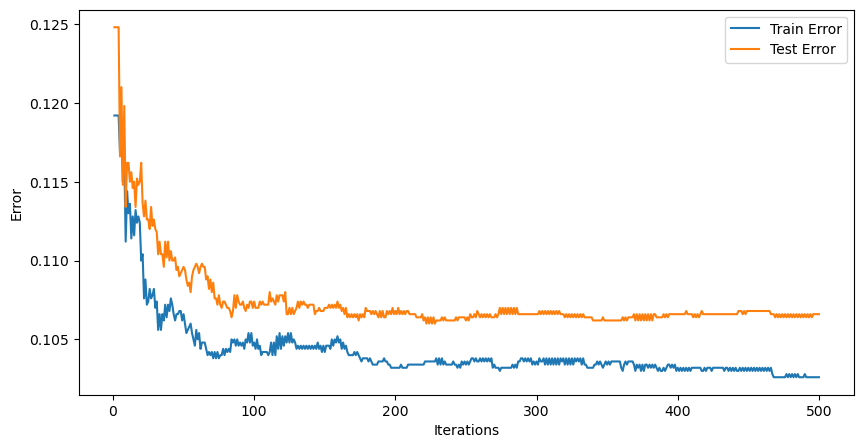

In [3]:
# a with joblib

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Decision stump implementation with weighted examples
class DecisionStump:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y, weights):
        X = np.array(X)
        y = np.array(y, dtype=float)
        weights = np.array(weights, dtype=float)

        n_features = X.shape[1]
        best_gain = -1

        for feature in range(n_features):
            for threshold in np.unique(X[:, feature]):
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_class = np.sign(np.sum(weights[left_mask] * y[left_mask]))
                right_class = np.sign(np.sum(weights[right_mask] * y[right_mask]))

                weighted_error = np.sum(weights[left_mask] * (y[left_mask] != left_class)) + \
                                 np.sum(weights[right_mask] * (y[right_mask] != right_class))

                gain = 1 - weighted_error / np.sum(weights)
                if gain > best_gain:
                    best_gain = gain
                    self.feature = feature
                    self.threshold = threshold
                    self.left_class = left_class
                    self.right_class = right_class

    def predict(self, X):
        predictions = np.where(X[:, self.feature] <= self.threshold, self.left_class, self.right_class)
        return predictions

# AdaBoost implementation
class AdaBoost:
    def __init__(self, T=50):
        self.T = T
        self.stumps = []
        self.stump_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.T):
            stump = DecisionStump()
            stump.fit(X, y, weights)
            predictions = stump.predict(X)

            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            stump_weight = 0.5 * np.log((1 - error) / (error + 1e-10))

            self.stumps.append(stump)
            self.stump_weights.append(stump_weight)

            weights *= np.exp(-stump_weight * y * predictions)
            weights /= np.sum(weights)

    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        for stump, weight in zip(self.stumps, self.stump_weights):
            final_predictions += weight * stump.predict(X)
        return np.sign(final_predictions)

# Load and preprocess the dataset
train_data = pd.read_csv('Data/bank/train.csv', header=None)
test_data = pd.read_csv('Data/bank/test.csv', header=None)

train_data.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                      'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                      'previous', 'poutcome', 'label']
test_data.columns = train_data.columns

numerical_attributes = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

def make_binary(data, numerical_attributes):
    for attr in numerical_attributes:
        median_value = data[attr].median()
        data[attr] = (data[attr] >= median_value).astype(int)
    return data

train_data = make_binary(train_data, numerical_attributes)
test_data = make_binary(test_data, numerical_attributes)

train_data['label'] = train_data['label'].replace({'yes': 1, 'no': -1})
test_data['label'] = test_data['label'].replace({'yes': 1, 'no': -1})

X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Parallelized fitting and error computation
def fit_and_evaluate(T):
    model = AdaBoost(T=T)
    model.fit(X_train, y_train)
    train_error = np.mean(model.predict(X_train) != y_train)
    test_error = np.mean(model.predict(X_test) != y_test)
    return train_error, test_error

T_values = range(1, 501)

# Use joblib's Parallel to parallelize over the T values
results = Parallel(n_jobs=14)(delayed(fit_and_evaluate)(T) for T in T_values)

train_errors, test_errors = zip(*results)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(T_values, train_errors, label='Train Error')
plt.plot(T_values, test_errors, label='Test Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()


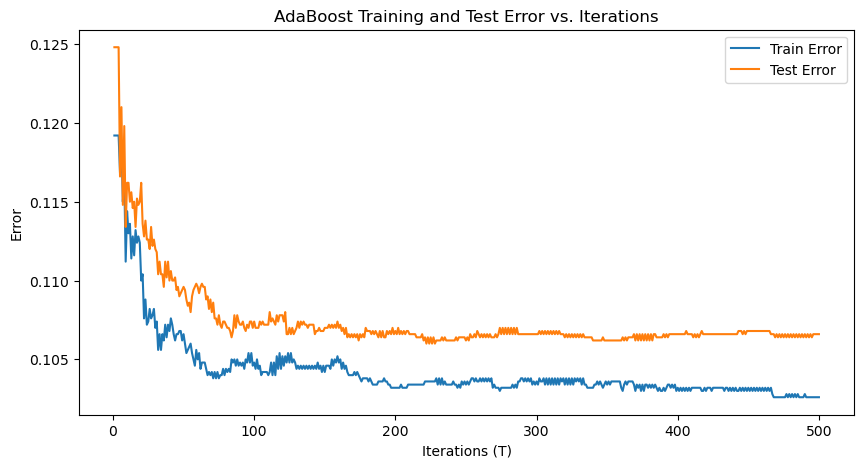

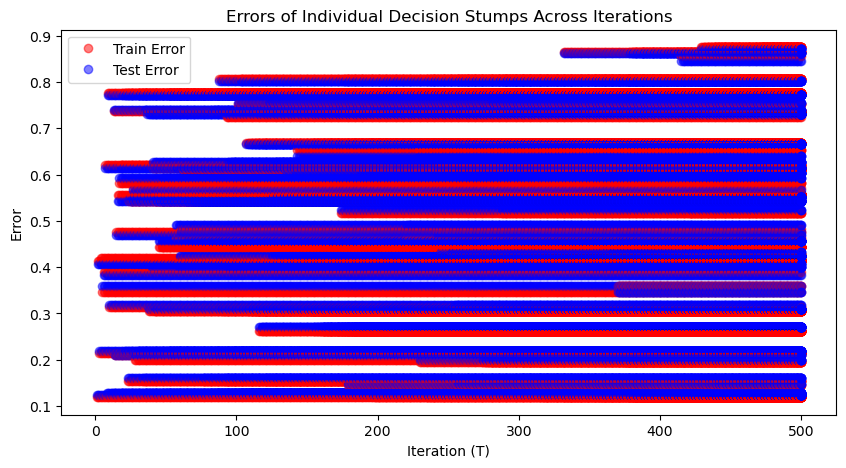

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Decision stump implementation with weighted examples
class DecisionStump:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y, weights):
        X = np.array(X)
        y = np.array(y, dtype=float)
        weights = np.array(weights, dtype=float)

        n_features = X.shape[1]
        best_gain = -1

        for feature in range(n_features):
            for threshold in np.unique(X[:, feature]):
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_class = np.sign(np.sum(weights[left_mask] * y[left_mask]))
                right_class = np.sign(np.sum(weights[right_mask] * y[right_mask]))

                weighted_error = np.sum(weights[left_mask] * (y[left_mask] != left_class)) + \
                                 np.sum(weights[right_mask] * (y[right_mask] != right_class))

                gain = 1 - weighted_error / np.sum(weights)
                if gain > best_gain:
                    best_gain = gain
                    self.feature = feature
                    self.threshold = threshold
                    self.left_class = left_class
                    self.right_class = right_class

    def predict(self, X):
        predictions = np.where(X[:, self.feature] <= self.threshold, self.left_class, self.right_class)
        return predictions

# AdaBoost implementation
class AdaBoost:
    def __init__(self, T=50):
        self.T = T
        self.stumps = []
        self.stump_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.T):
            stump = DecisionStump()
            stump.fit(X, y, weights)
            predictions = stump.predict(X)

            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            stump_weight = 0.5 * np.log((1 - error) / (error + 1e-10))

            self.stumps.append(stump)
            self.stump_weights.append(stump_weight)

            weights *= np.exp(-stump_weight * y * predictions)
            weights /= np.sum(weights)

    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        for stump, weight in zip(self.stumps, self.stump_weights):
            final_predictions += weight * stump.predict(X)
        return np.sign(final_predictions)

# Load and preprocess the dataset
train_data = pd.read_csv('Data/bank/train.csv', header=None)
test_data = pd.read_csv('Data/bank/test.csv', header=None)

train_data.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                      'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                      'previous', 'poutcome', 'label']
test_data.columns = train_data.columns

numerical_attributes = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

def make_binary(data, numerical_attributes):
    for attr in numerical_attributes:
        median_value = data[attr].median()
        data[attr] = (data[attr] >= median_value).astype(int)
    return data

train_data = make_binary(train_data, numerical_attributes)
test_data = make_binary(test_data, numerical_attributes)

train_data['label'] = train_data['label'].replace({'yes': 1, 'no': -1})
test_data['label'] = test_data['label'].replace({'yes': 1, 'no': -1})

X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Collect train and test errors for each stump at every iteration
def fit_and_evaluate_stumps(T):
    model = AdaBoost(T=T)
    model.fit(X_train, y_train)

    stump_train_errors = []
    stump_test_errors = []

    for stump, weight in zip(model.stumps, model.stump_weights):
        stump_train_error = np.mean(stump.predict(X_train) != y_train)
        stump_test_error = np.mean(stump.predict(X_test) != y_test)
        stump_train_errors.append(stump_train_error)
        stump_test_errors.append(stump_test_error)

    train_error = np.mean(model.predict(X_train) != y_train)
    test_error = np.mean(model.predict(X_test) != y_test)

    return train_error, test_error, stump_train_errors, stump_test_errors

T_values = range(1, 501)

# Use joblib's Parallel to parallelize over the T values
results = Parallel(n_jobs=14)(delayed(fit_and_evaluate_stumps)(T) for T in T_values)

# Unpack the results
train_errors, test_errors, all_stump_train_errors, all_stump_test_errors = zip(*results)

# Plot 1: Training and test errors for AdaBoost over iterations
plt.figure(figsize=(10, 5))
plt.plot(T_values, train_errors, label='Train Error')
plt.plot(T_values, test_errors, label='Test Error')
plt.xlabel('Iterations (T)')
plt.ylabel('Error')
plt.legend()
plt.title('AdaBoost Training and Test Error vs. Iterations')
plt.show()

# Plot 2: Training and test errors for individual stumps
plt.figure(figsize=(10, 5))
for i, (stump_train_errors, stump_test_errors) in enumerate(zip(all_stump_train_errors, all_stump_test_errors)):
    plt.plot([i + 1] * len(stump_train_errors), stump_train_errors, 'ro', alpha=0.5, label='Train Error' if i == 0 else "")
    plt.plot([i + 1] * len(stump_test_errors), stump_test_errors, 'bo', alpha=0.5, label='Test Error' if i == 0 else "")

plt.xlabel('Iteration (T)')
plt.ylabel('Error')
plt.title('Errors of Individual Decision Stumps Across Iterations')
plt.legend()
plt.show()


In [12]:
np.array(stump_train_errors).min()
np.array(stump_test_errors).mean()

0.48630880000000004

In [13]:
np.array(train_errors).min()
np.array(test_errors).mean()

0.1074672

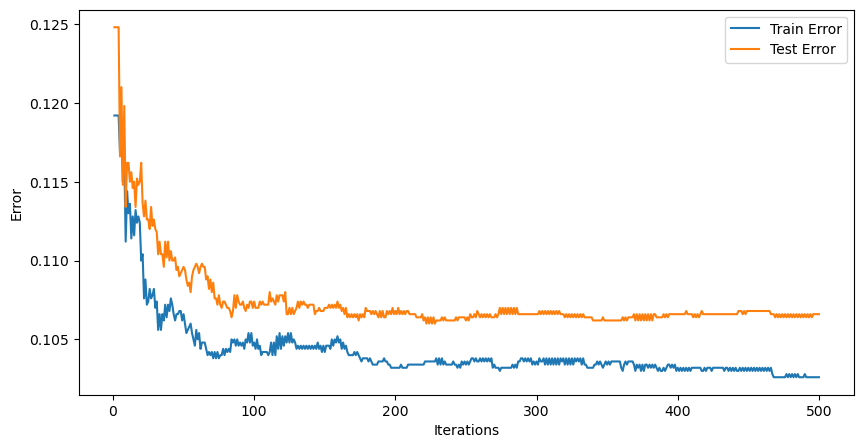

In [2]:
#b using parrallel computing

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  

# Decision stump implementation with weighted examples
class DecisionStump:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    def fit(self, X, y, weights):
        X = np.array(X)
        y = np.array(y, dtype=float)
        weights = np.array(weights, dtype=float)

        n_features = X.shape[1]
        best_gain = -1

        for feature in range(n_features):
            for threshold in np.unique(X[:, feature]):
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_class = np.sign(np.sum(weights[left_mask] * y[left_mask]))
                right_class = np.sign(np.sum(weights[right_mask] * y[right_mask]))

                weighted_error = np.sum(weights[left_mask] * (y[left_mask] != left_class)) + \
                                 np.sum(weights[right_mask] * (y[right_mask] != right_class))

                gain = 1 - weighted_error / np.sum(weights)
                if gain > best_gain:
                    best_gain = gain
                    self.feature = feature
                    self.threshold = threshold
                    self.left_class = left_class
                    self.right_class = right_class

    def predict(self, X):
        predictions = np.where(X[:, self.feature] <= self.threshold, self.left_class, self.right_class)
        return predictions

# AdaBoost implementation
class AdaBoost:
    def __init__(self, T=50):
        self.T = T
        self.stumps = []
        self.stump_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.T):
            stump = DecisionStump()
            stump.fit(X, y, weights)
            predictions = stump.predict(X)

            error = np.sum(weights * (predictions != y)) / np.sum(weights)
            stump_weight = 0.5 * np.log((1 - error) / (error + 1e-10))

            self.stumps.append(stump)
            self.stump_weights.append(stump_weight)

            weights *= np.exp(-stump_weight * y * predictions)
            weights /= np.sum(weights)

    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        for stump, weight in zip(self.stumps, self.stump_weights):
            final_predictions += weight * stump.predict(X)
        return np.sign(final_predictions)

# Function to impute missing values with the majority value
def impute_missing_values(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)
        else:
            median_value = data[column].median()
            data[column].fillna(median_value, inplace=True)
    return data

# Load and preprocess the dataset
train_data = pd.read_csv('Data/bank/train.csv', header=None)
test_data = pd.read_csv('Data/bank/test.csv', header=None)

train_data.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                      'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                      'previous', 'poutcome', 'label']
test_data.columns = train_data.columns

# Impute missing values
train_data = impute_missing_values(train_data)
test_data = impute_missing_values(test_data)

numerical_attributes = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

def make_binary(data, numerical_attributes):
    for attr in numerical_attributes:
        median_value = data[attr].median()
        data[attr] = (data[attr] >= median_value).astype(int)
    return data

train_data = make_binary(train_data, numerical_attributes)
test_data = make_binary(test_data, numerical_attributes)

train_data['label'] = train_data['label'].replace({'yes': 1, 'no': -1})
test_data['label'] = test_data['label'].replace({'yes': 1, 'no': -1})

X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Parallelized function for fitting the AdaBoost model and collecting errors
def compute_errors(T):
    model = AdaBoost(T=T)
    model.fit(X_train, y_train)
    train_error = np.mean(model.predict(X_train) != y_train)
    test_error = np.mean(model.predict(X_test) != y_test)
    return train_error, test_error

# Parallel execution over multiple iterations using joblib
T_values = range(1, 501)
results = Parallel(n_jobs=-1)(delayed(compute_errors)(T) for T in T_values)

# Extract train and test errors from the results
train_errors, test_errors = zip(*results)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(T_values, train_errors, label='Train Error')
plt.plot(T_values, test_errors, label='Test Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed

# Ensure all cores are used
N_CORES = 14  # Adjust this to your available cores

class DecisionTree:
    def __init__(self):
        self.tree = None

    def fit(self, data, attributes):
        self.tree = self._build_tree(data, attributes)

    def _build_tree(self, data, attributes):
        labels = data.iloc[:, -1]
        if len(labels.unique()) == 1:
            return labels.iloc[0]
        if not attributes:
            return labels.mode()[0]
        best_attr = self._choose_best_attribute(data, attributes)
        tree = {best_attr: {}}
        for attr_value, subset in split_data(data, best_attr).items():
            remaining_attrs = [attr for attr in attributes if attr != best_attr]
            subtree = self._build_tree(subset, remaining_attrs)
            tree[best_attr][attr_value] = subtree
        return tree

    def _choose_best_attribute(self, data, attributes):
        best_gain = -1
        best_attr = None
        for attr in attributes:
            gain = information_gain(data, attr)
            if gain > best_gain:
                best_gain = gain
                best_attr = attr
        return best_attr

    def predict(self, example):
        return predict(self.tree, example)

class BaggedTrees:
    def __init__(self, num_trees=500):
        self.num_trees = num_trees
        self.trees = []

    def fit(self, data, attributes):
        # Train trees in parallel across 14 cores
        self.trees = Parallel(n_jobs=N_CORES, backend='loky')(
            delayed(self._train_single_tree)(data, attributes) for _ in range(self.num_trees)
        )

    def _train_single_tree(self, data, attributes):
        sample_data = bootstrap_sample(data)
        tree = DecisionTree()
        tree.fit(sample_data, attributes)
        return tree

    def predict(self, data):
        # Predict in parallel using 14 cores
        predictions = Parallel(n_jobs=N_CORES, backend='loky')(
            delayed(self._predict_single_tree)(tree, data) for tree in self.trees
        )
        return np.array(predictions)

    def _predict_single_tree(self, tree, data):
        return np.array([tree.predict(row) for _, row in data.iterrows()])

def bootstrap_sample(data):
    """Create a bootstrap sample from the given dataset."""
    n = len(data)
    sample_indices = [random.randint(0, n - 1) for _ in range(n)]
    return data.iloc[sample_indices]

def split_data(data, attribute_name):
    return {attr_value: data[data[attribute_name] == attr_value] for attr_value in data[attribute_name].unique()}

def information_gain(data, attribute_name):
    total_entropy = entropy(data)
    splits = split_data(data, attribute_name)
    total_size = len(data)
    weighted_entropy = sum((len(subset) / total_size) * entropy(subset) for subset in splits.values())
    return total_entropy - weighted_entropy

def entropy(data):
    label_count = data.iloc[:, -1].value_counts().to_dict()
    total = len(data)
    return -sum((count / total) * np.log2(count / total) for count in label_count.values())

def predict(tree, example):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    value = example[attr]
    subtree = tree[attr].get(value)
    if subtree is None:
        return 0  # Default prediction if value is not found
    return predict(subtree, example)

# Load and preprocess the dataset
train_data = pd.read_csv('Data/bank/train.csv', header=None)
test_data = pd.read_csv('Data/bank/test.csv', header=None)

train_data.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                      'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                      'previous', 'poutcome', 'label']
test_data.columns = train_data.columns

numerical_attributes = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

def make_binary(data, numerical_attributes):
    for attr in numerical_attributes:
        median_value = data[attr].median()
        data[attr] = (data[attr] >= median_value).astype(int)
    return data

train_data = make_binary(train_data, numerical_attributes)
test_data = make_binary(test_data, numerical_attributes)

train_data['label'] = train_data['label'].replace({'yes': 1, 'no': 0})
test_data['label'] = test_data['label'].replace({'yes': 1, 'no': 0})

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Experiment: Run 100 times with bagged trees and single trees
num_repeats = 100
bagged_predictions = np.zeros((num_repeats, len(X_test)))
single_tree_predictions = np.zeros((num_repeats, len(X_test)))

for i in range(num_repeats):
    sample_data = train_data.sample(1000, replace=False)
    attributes = list(X_test.columns)

    # Train 500 bagged trees
    bagged_model = BaggedTrees(num_trees=500)
    bagged_model.fit(sample_data, attributes)
    bagged_predictions[i] = bagged_model.predict(X_test).mean(axis=0)

    # Use the first tree from the bagged model as a single tree learner
    single_tree = bagged_model.trees[0]
    single_tree_predictions[i] = [single_tree.predict(row) for _, row in X_test.iterrows()]

# Compute bias, variance, and squared error for single trees
bias_single = np.mean((np.mean(single_tree_predictions, axis=0) - y_test) ** 2)
variance_single = np.mean(np.var(single_tree_predictions, axis=0))
squared_error_single = bias_single + variance_single

# Compute bias, variance, and squared error for bagged trees
bias_bagged = np.mean((np.mean(bagged_predictions, axis=0) - y_test) ** 2)
variance_bagged = np.mean(np.var(bagged_predictions, axis=0))
squared_error_bagged = bias_bagged + variance_bagged

# Print the results
print(f"Single Tree - Bias: {bias_single}, Variance: {variance_single}, Squared Error: {squared_error_single}")
print(f"Bagged Trees - Bias: {bias_bagged}, Variance: {variance_bagged}, Squared Error: {squared_error_bagged}")

# Plot the results
labels = ['Bias', 'Variance', 'Squared Error']
single_values = [bias_single, variance_single, squared_error_single]
bagged_values = [bias_bagged, variance_bagged, squared_error_bagged]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, single_values, width, label='Single Tree')
ax.bar(x + width/2, bagged_values, width, label='Bagged Trees')

ax.set_xlabel('Metric')
ax.set_title('Bias, Variance, and Squared Error Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


c:\Users\mattj\anaconda3\envs\stat486\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [18]:
#3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from joblib import Parallel, delayed

# Ensure all cores are used efficiently
N_CORES = -1  # Use all available cores

class DecisionTreeWithRandomFeatures:
    def __init__(self, feature_subset_size):
        self.tree = None
        self.feature_subset_size = feature_subset_size

    def fit(self, data, attributes):
        self.tree = self._build_tree(data, attributes)

    def _build_tree(self, data, attributes):
        labels = data.iloc[:, -1]
        if len(labels.unique()) == 1:
            return labels.iloc[0]
        if not attributes:
            return labels.mode()[0]
        
        best_attr = self._choose_best_attribute(data, attributes)
        tree = {best_attr: {}}
        
        for attr_value, subset in split_data(data, best_attr).items():
            remaining_attrs = [attr for attr in attributes if attr != best_attr]
            subtree = self._build_tree(subset, remaining_attrs)
            tree[best_attr][attr_value] = subtree
        
        return tree

    def _choose_best_attribute(self, data, attributes):
        # Ensure feature subset size is not larger than available attributes
        subset_size = min(self.feature_subset_size, len(attributes))
        random_subset = random.sample(attributes, subset_size)
        
        best_gain = -1
        best_attr = None
        for attr in random_subset:
            gain = information_gain(data, attr)
            if gain > best_gain:
                best_gain = gain
                best_attr = attr
        return best_attr

    def predict(self, example):
        return predict(self.tree, example)


class RandomForest:
    def __init__(self, num_trees=500, feature_subset_size=2):
        self.num_trees = num_trees
        self.feature_subset_size = feature_subset_size
        self.trees = []

    def fit(self, data, attributes):
        # Train trees in parallel
        self.trees = Parallel(n_jobs=N_CORES)(
            delayed(self._train_single_tree)(data, attributes) for _ in range(self.num_trees)
        )

    def _train_single_tree(self, data, attributes):
        sample_data = bootstrap_sample(data)
        tree = DecisionTreeWithRandomFeatures(self.feature_subset_size)
        tree.fit(sample_data, attributes)
        return tree

    def predict(self, data):
        # Parallel prediction
        predictions = Parallel(n_jobs=N_CORES)(
            delayed(self._predict_single_tree)(tree, data) for tree in self.trees
        )
        return np.array(predictions).mean(axis=0)

    def _predict_single_tree(self, tree, data):
        return np.array([tree.predict(row) for _, row in data.iterrows()])


def bootstrap_sample(data):
    """Create a bootstrap sample from the given dataset."""
    n = len(data)
    sample_indices = np.random.randint(0, n, size=n)
    return data.iloc[sample_indices]

def split_data(data, attribute_name):
    """Split data based on attribute value."""
    return {attr_value: data[data[attribute_name] == attr_value] for attr_value in data[attribute_name].unique()}

def information_gain(data, attribute_name):
    """Compute the information gain for a given attribute."""
    total_entropy = entropy(data)
    splits = split_data(data, attribute_name)
    total_size = len(data)
    weighted_entropy = sum((len(subset) / total_size) * entropy(subset) for subset in splits.values())
    return total_entropy - weighted_entropy

def entropy(data):
    """Calculate entropy of the dataset."""
    label_count = data.iloc[:, -1].value_counts().to_dict()
    total = len(data)
    return -sum((count / total) * np.log2(count / total) for count in label_count.values())

def predict(tree, example):
    """Recursive tree traversal for prediction."""
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    value = example[attr]
    subtree = tree[attr].get(value)
    if subtree is None:
        return 0  # Default prediction if value not found
    return predict(subtree, example)

# Load and preprocess the dataset
data = pd.read_csv('default_of_credit_card_clients.csv', header=1)
train_data = data.sample(24000, random_state=42)
test_data = data.drop(train_data.index)

X_train = train_data.drop('default payment next month', axis=1)
y_train = train_data['default payment next month']
X_test = test_data.drop('default payment next month', axis=1)
y_test = test_data['default payment next month']

attributes = list(X_train.columns)

# Train and evaluate random forest models with different feature subset sizes
train_errors = {}
test_errors = {}

for feature_size in [2, 4, 6]:
    train_errors[feature_size] = []
    test_errors[feature_size] = []
    
    for num_trees in range(1, 501, 10):
        rf_model = RandomForest(num_trees=num_trees, feature_subset_size=feature_size)
        rf_model.fit(train_data, attributes)

        train_pred = rf_model.predict(X_train)
        test_pred = rf_model.predict(X_test)

        train_errors[feature_size].append(np.mean(train_pred != y_train))
        test_errors[feature_size].append(np.mean(test_pred != y_test))

# Plot training and test errors
for feature_size in [2, 4, 6]:
    plt.plot(range(1, 501, 10), train_errors[feature_size], label=f'Train - {feature_size} features')
    plt.plot(range(1, 501, 10), test_errors[feature_size], label=f'Test - {feature_size} features')

plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()
plt.title('Random Forest Training and Test Errors')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'default_of_credit_card_clients.csv'

In [17]:
train_errors = {}
test_errors = {}

# Experiment with feature subset sizes 2, 4, and 6
for feature_size in [2, 4, 6]:
    train_errors[feature_size] = []
    test_errors[feature_size] = []

    # Vary the number of trees from 1 to 500
    for num_trees in range(1, 501, 10):  # Increase in steps of 10 for efficiency
        model = RandomForest(num_trees=num_trees, feature_subset_size=feature_size)
        model.fit(train_data, attributes)

        # Compute train and test errors
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_errors[feature_size].append(np.mean(train_pred != y_train))
        test_errors[feature_size].append(np.mean(test_pred != y_test))

# Plot the errors
for feature_size in [2, 4, 6]:
    plt.plot(range(1, 501, 10), train_errors[feature_size], label=f'Train - {feature_size} features')
    plt.plot(range(1, 501, 10), test_errors[feature_size], label=f'Test - {feature_size} features')

plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()
plt.title('Random Forest Training and Test Errors')
plt.show()


ValueError: Sample larger than population or is negative

In [ ]:
# Single tree model
single_tree_model = RandomForest(num_trees=1, feature_subset_size=2)
single_tree_model.fit(train_data, attributes)
single_tree_pred = np.array([single_tree_model.predict(X_test) for _ in range(100)])

# Full forest model with 500 trees
full_forest_model = RandomForest(num_trees=500, feature_subset_size=6)
full_forest_model.fit(train_data, attributes)
full_forest_pred = np.array([full_forest_model.predict(X_test) for _ in range(100)])

# Calculate Bias, Variance, and Squared Error
bias_single = np.mean((single_tree_pred.mean(axis=0) - y_test) ** 2)
variance_single = np.mean(np.var(single_tree_pred, axis=0))
squared_error_single = bias_single + variance_single

bias_forest = np.mean((full_forest_pred.mean(axis=0) - y_test) ** 2)
variance_forest = np.mean(np.var(full_forest_pred, axis=0))
squared_error_forest = bias_forest + variance_forest

print(f'Single Tree - Bias: {bias_single}, Variance: {variance_single}, Squared Error: {squared_error_single}')
print(f'Random Forest - Bias: {bias_forest}, Variance: {variance_forest}, Squared Error: {squared_error_forest}')
